<a href="https://colab.research.google.com/github/Mesfrum/gold-price/blob/main/goldy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries

In [ ]:
# for data
import numpy as np
import pandas as pd
# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# for training testing 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# for evaluating model
from sklearn import metrics

Data collection and processing

In [ ]:
# loading csv to pandas dataframe(df)
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
# scope out csv
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# check number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# statiscal measure of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Find correlation between two types of column.
Always check correlation when using regression model.

Two types of correlation -
* positive correlation 
* negatiive correlation

In [ ]:
correlation = gold_data.corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

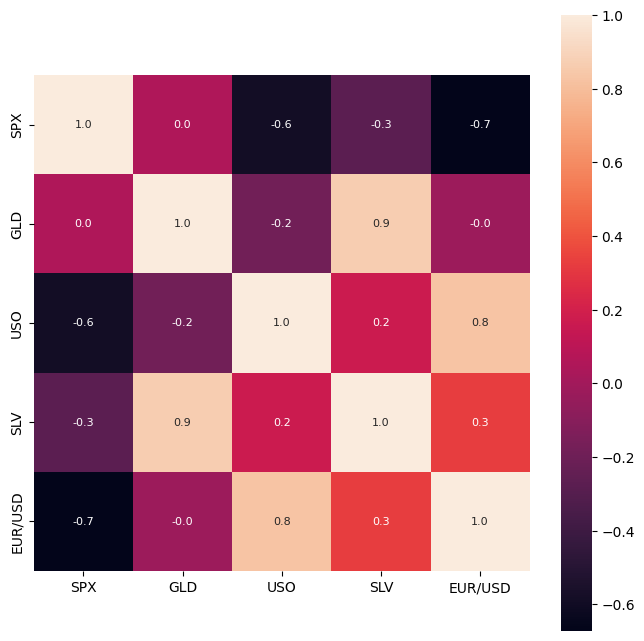

In [ ]:
# a heat map to visvualize these values
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='rocket')

In [ ]:
# correaltion values for gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


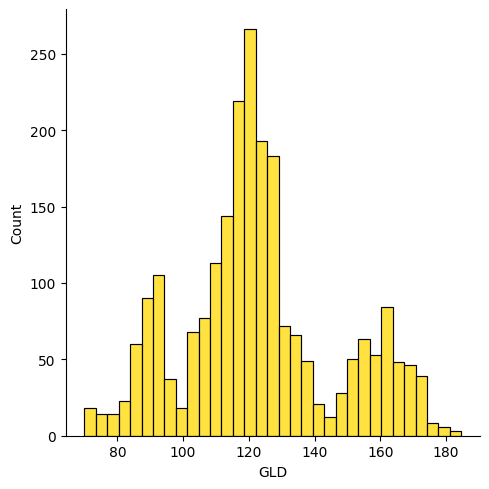

In [ ]:
# max - min of gold prices in data
sns.displot(gold_data['GLD'],color = 'gold')

The above plot shows that most of vales in gold are concentrated towards the 120-140 range.

Split target (gold) and features (uso,silver,spx and euro/usd) 

In [ ]:
X = gold_data.drop(['Date','GLD'],axis = 1) # date is irrelevant
Y = gold_data['GLD']

print(X) # every column except gold

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y) # gold column

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Now split these datas into training data and testing data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

# split data into training data and testing data, 80% - 20% -> below code checks count of training and testing data 
print((X_train.shape[0]),(X_test.shape[0]),(Y_train.shape[0]),(Y_test.shape[0]))

1832 458 1832 458


Model Training

In [ ]:
regressor = RandomForestRegressor(n_estimators=100, random_state = 2)


In [ ]:
# training the model
regressor.fit(X_train,Y_train) 

RandomForestRegressor(random_state=2)

Model evalution

In [ ]:
# prediction on test data
test_data_prediciton = regressor.predict(X_test)
print(test_data_prediciton)

[168.11379932  82.23519965 116.22490032 127.70480079 120.65890158
 154.78889721 149.69589755 126.12270048 117.41669876 126.11890066
 116.90020126 171.56690077 141.86319844 167.79489879 115.18020028
 117.81960059 139.20070298 170.28390114 159.17470285 158.59569966
 155.07480021 125.23220003 176.43619959 156.89410326 125.24900038
  93.86899998  76.93210017 120.74380005 119.12259955 167.61919981
  88.18580007 125.26050004  91.07990071 117.57250049 121.07749913
 136.55970098 115.53570086 115.39860083 148.97049957 107.18050102
 104.19980257  87.24959778 126.5021005  118.20639983 153.41749912
 119.73489967 108.46519982 108.01749814  92.99170026 127.27349752
  75.56760045 113.79569945 121.32939993 111.31929935 118.86579891
 120.89249961 158.77939994 168.49440108 147.09019666  85.77549852
  94.23570036  86.7967992   90.46990009 119.01700073 126.45980073
 127.62500019 170.14950032 122.25569933 117.49489887  98.44850012
 167.97310066 142.75829825 131.95160314 121.0854019  121.10159948
 119.84490

In [ ]:
# R squared error to computer error rate
error_score = metrics.r2_score(Y_test,test_data_prediciton)
print(error_score)

0.9884562581856317


Visualize actual values to predicted value

In [ ]:
Y_test = list(Y_test)

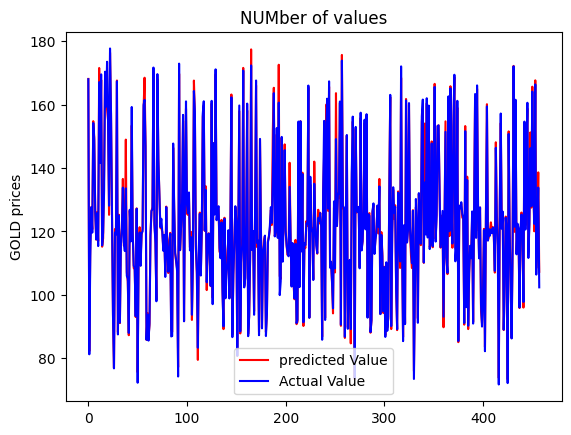

In [ ]:
plt.plot(test_data_prediciton, color='red',label = 'predicted Value')
plt.plot(Y_test,color='blue',label = 'Actual Value')
plt.title('NUMber of values')
plt.ylabel('GOLD prices')
plt.legend()
plt.show()